In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn as sklearn
from sklearn.datasets import load_iris

In [ ]:
def plot_sep(w, X, Y, color='green'):
  ''' Plot decision boundary hypothesis
  w1 * sepal_len + w2 * sepal_wid = 0
  in input space, highlighting the hyperplane '''
  w0=w[0,0]
  w1=w[1,0]
  w2=w[2,0]
  plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Paired)
  plt.title("Separation in Input Space")
  plt.ylim([np.amin(X[:,1]),np.amax(X[:,1])])
  plt.xlim([np.amin(X[:,0]),np.amax(X[:,0])])
  plt.xlabel("X1")
  plt.ylabel("X2")
  if w2 != 0:
     m = -w1/w2
     t = 1 if w2 > 0 else -1
     plt.plot([np.amin(X[:,0]),np.amax(X[:,0])],[np.amin(X[:,0])*m- w0/w2, np.amax(X[:,0])*m- w0/w2],'-y',color=color)
     plt.fill_between(
                    [np.amin(X[:,0]),np.amax(X[:,0])],
                    [np.amin(X[:,0])*m- w0/w2, np.amax(X[:,0])*m- w0/w2],
                    [t*np.amax(np.abs(X[:,1]))],
                    alpha=0.2,
                    color=color)
  if w2 == 0: # decision boundary is vertical
      t = 1 if w1 > 0 else -1
      plt.plot([0, 0],[np.amin(X[:,0]), np.amax(X[:,0])],'-y',color=color)
      plt.fill_between(
                    [0, np.amax(np.abs(X))*t],
                    [-np.amax(np.abs(X))],
                    [np.amax(np.abs(X))],
                    alpha=0.2,
                    color=color)

In [ ]:
# Vectorize plr2d
def plr2d_vectorize(X ,T, N):
    #initilize input as np array and convert to row vector
    X=np.array(X)
    if (np.size(X,0) >= np.size(X,1)):
      X=np.transpose(X)

    #initilize weight vector
    W=np.zeros((X.shape[0]+1,1))
    
    # Perceptron learning
    for n in range(0,N,1):
      mismatched=False
      for i in range(T.shape[0]):
        z=np.dot(X[:,i],W[1:])+W[0]
        if z*(T[i]) <= 0:
          mismatched = True
          W[0] = W[0] + (T[i])*1
          W[1] = W[1] + (T[i])*(X[0,i])
          W[2] = W[2] + (T[i])*(X[1,i])
      if mismatched == False:
        print("converged: n=",n)
        break

    print("learning done")
    for i in range(0,T.shape[0]):
      z=np.dot(X[:,i],W[1:])+W[0]
      if z*(T[i]) <= 0:
        print("mismatch[",i,"]")

    return W

In [ ]:
def create_data_linear(s):
  a=np.random.random([int (s),2])*5
  b=np.zeros(int (s))
  for i in range(int(s)):
    if (a[i,0]+a[i,1]>= 5):
      b[i]=1
    else:
      b[i]= -1
  return (a,b)

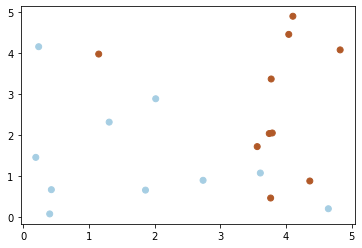

In [ ]:
#adding noise
X1,Y1= create_data_linear(20)
Y1[0]=Y1[0]*-1
plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap=plt.cm.Paired)



learning done
mismatch[ 2 ]
mismatch[ 4 ]
mismatch[ 12 ]
mismatch[ 13 ]
mismatch[ 16 ]
mismatch[ 17 ]
[[-14.        ]
 [  5.06489997]
 [  6.49295091]]


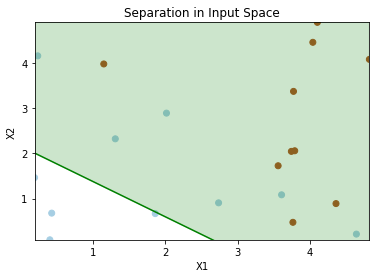

In [ ]:
# if the maximum iteration condition is removed the function will be in an infinte loop as Perceptron learning rule will not converge and hence the function will not terminate 
#plotting hyper plane with low threshold for iterations
W1=plr2d_vectorize(X1 ,Y1, 10)
print(W1)
plot_sep(W1,X1,Y1)

learning done
mismatch[ 0 ]
mismatch[ 5 ]
[[-35.        ]
 [  6.35172722]
 [  7.20269672]]


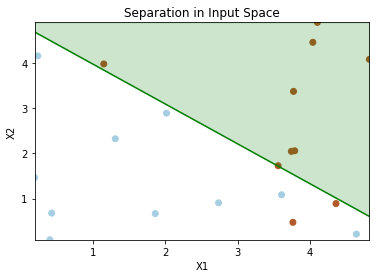

In [ ]:
#plotting hyper plane with a high threshold of iterations
W1=plr2d_vectorize(X1 ,Y1, 100)
print(W1)
plot_sep(W1,X1,Y1)

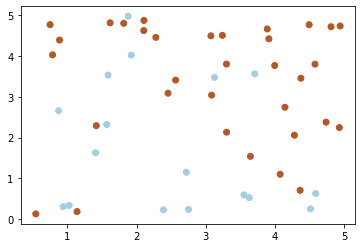

In [ ]:
#adding more noise and complex dataset
X2,Y2= create_data_linear(50)
for i in range(10):
  Y2[i]=Y2[i]*-1
plt.scatter(X2[:,0],X2[:,1],c=Y2,cmap=plt.cm.Paired)

learning done
mismatch[ 1 ]
mismatch[ 2 ]
mismatch[ 3 ]
mismatch[ 4 ]
mismatch[ 6 ]
mismatch[ 8 ]
mismatch[ 9 ]
mismatch[ 22 ]
mismatch[ 29 ]
mismatch[ 30 ]
mismatch[ 39 ]
mismatch[ 40 ]
mismatch[ 49 ]
[[-7.        ]
 [-0.74143658]
 [ 5.04647957]]


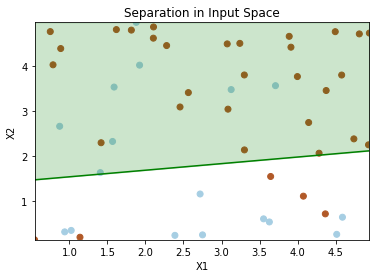

In [ ]:
#plotting hyper plane with low threshold for iterations
W2=plr2d_vectorize(X2 ,Y2, 10)
print(W2)
plot_sep(W2,X2,Y2)

learning done
mismatch[ 1 ]
mismatch[ 2 ]
mismatch[ 3 ]
mismatch[ 4 ]
mismatch[ 6 ]
mismatch[ 8 ]
mismatch[ 9 ]
mismatch[ 22 ]
mismatch[ 30 ]
mismatch[ 39 ]
[[-13.        ]
 [  1.96483577]
 [  5.06034577]]


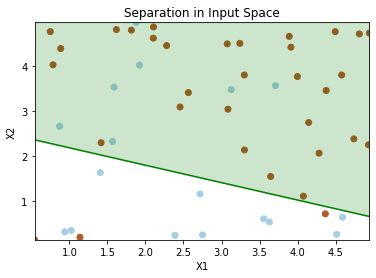

In [ ]:
W2=plr2d_vectorize(X2 ,Y2, 100)
print(W2)
plot_sep(W2,X2,Y2)

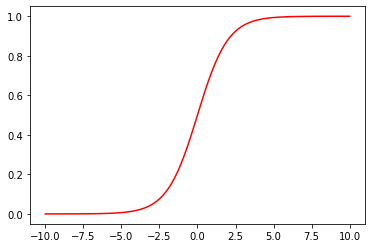

In [ ]:
#plotting 1/1+e^-x
x = np.linspace(-10,10,100)
a=np.divide(1,np.add(1,np.exp(np.multiply(x,-1))))

fig = plt.figure()
plt.plot(x,a, 'r')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


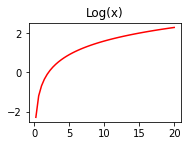

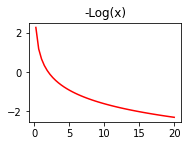

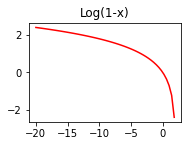

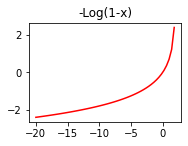

In [ ]:
#plotting log functions
x1 = np.linspace(-20,20,100)
a=np.log(x)
b=np.multiply(-1,np.log(x))
c=np.log(np.subtract(1,x))
d=np.multiply(-1,np.log(np.subtract(1,x)))

fig = plt.figure()
plt.subplot(2,2,1)
plt.title("Log(x)")
plt.plot(x1,a, 'r')
plt.show()

fig = plt.figure()
plt.subplot(2,2,2)
plt.title("-Log(x)")
plt.plot(x1,b, 'r')
plt.show()

fig = plt.figure()
plt.subplot(2,2,3)
plt.title("Log(1-x)")
plt.plot(x1,c, 'r')
plt.show()

fig = plt.figure()
plt.subplot(2,2,3)
plt.title("-Log(1-x)")
plt.plot(x1,d, 'r')
plt.show()

In [ ]:
def logistic(z):
    """Logistic function."""
    return (np.divide(1,np.add(1,np.exp(np.multiply(z,-1)))))

In [ ]:
#-1(tlog(y)+ (1-t)log(1-y))
def loss(y,t,x):
  return (np.divide(np.sum(np.multiply(-1,np.add(np.multiply(t,np.log(y)),np.multiply(np.subtract(1,t),np.log(np.subtract(1,y)))))),x.shape[1]))
  


In [ ]:
def loss_stable(z,t,x):
  return (np.divide(np.sum(np.add(np.multiply(t,np.logaddexp(0,np.multiply(-1,z))),np.multiply(np.subtract(1,t),np.logaddexp(0,z)))),x.shape[1]))

In [ ]:
def log_res(x,t,n,learning_rate):
  X=np.array(x)
  if (np.size(X,0) >= np.size(X,1)):
    X=np.transpose(X)

  W=np.zeros((X.shape[0]))
  B=0
  for i in range(n):
    z=np.add(np.dot(W,X), B)
    y=logistic(z)
    if ((i)%50==0):
      print('iteration : ', i, ' loss : ',loss(y,t,x),' stable loss :',loss_stable(z,t,x))
    dw= np.divide(np.dot(X,np.subtract(y,t)),X.shape[1])
    db= np.divide(np.sum(np.subtract(y,t)),X.shape[1])

    W =  np.subtract(W,np.multiply(learning_rate,dw))
    B = B - learning_rate * db
  print('iteration : ', i+1, ' loss : ',loss(y,t,x),' stable loss :',loss_stable(z,t,x))
  return (W,B)
  

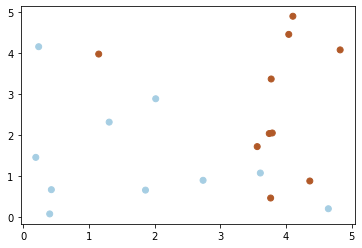

In [ ]:
for i in range(np.size(Y1)):
  if (Y1[i]==-1):
    Y1[i]=0
plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap=plt.cm.Paired)

iteration :  0  loss :  6.931471805599453  stable loss : 6.931471805599453
iteration :  50  loss :  5.674252909950868  stable loss : 5.674252909950868
iteration :  100  loss :  5.135306945545514  stable loss : 5.135306945545514
iteration :  150  loss :  4.758186905154294  stable loss : 4.758186905154294
iteration :  200  loss :  4.4830483540362245  stable loss : 4.4830483540362245
iteration :  250  loss :  4.274491820961691  stable loss : 4.274491820961692
iteration :  300  loss :  4.111138680892286  stable loss : 4.111138680892286
iteration :  350  loss :  3.9796321246097643  stable loss : 3.979632124609764
iteration :  400  loss :  3.871314452782853  stable loss : 3.871314452782853
iteration :  450  loss :  3.780373679180588  stable loss : 3.780373679180588
iteration :  500  loss :  3.7042231509316546  stable loss : 3.7042231509316546
[0.81351385 0.61383734]
-3.3165176950242636
[[-3.3165177 ]
 [ 0.81351385]
 [ 0.61383734]]
[[3.76615167 0.47389017]
 [1.14744941 3.98341757]
 [1.3069264

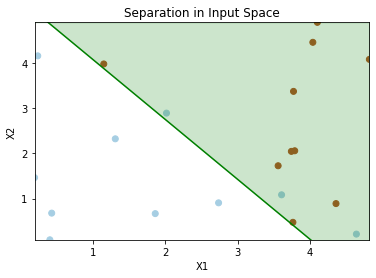

In [ ]:
W,B=log_res(X1,Y1,500,0.1)
a=np.array([[B],[W[0]],[W[1]]])
print(W)
print(B)
print (a)
print(X1)
plot_sep(a,X1,Y1)

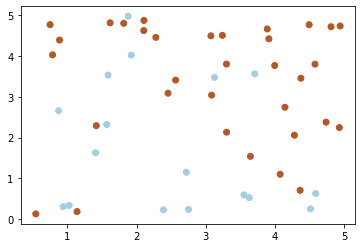

In [ ]:
for i in range(np.size(Y2)):
  if (Y2[i]==-1):
    Y2[i]=0
plt.scatter(X2[:,0],X2[:,1],c=Y2,cmap=plt.cm.Paired)

iteration :  0  loss :  17.328679513998633  stable loss : 17.328679513998633
iteration :  50  loss :  13.834647014269319  stable loss : 13.834647014269322
iteration :  100  loss :  13.619553931789032  stable loss : 13.619553931789032
iteration :  150  loss :  13.45471069077099  stable loss : 13.454710690770987
iteration :  200  loss :  13.324505654378283  stable loss : 13.324505654378283
iteration :  250  loss :  13.221188102915914  stable loss : 13.221188102915912
iteration :  300  loss :  13.13883799796693  stable loss : 13.13883799796693
iteration :  350  loss :  13.072902190940413  stable loss : 13.072902190940413
iteration :  400  loss :  13.019874616628247  stable loss : 13.019874616628247
iteration :  450  loss :  12.977047351137065  stable loss : 12.977047351137065
iteration :  500  loss :  12.942946567389592  stable loss : 12.942946567389592
[0.2398489  0.54747508]
-1.373087495603085
[[-1.3730875 ]
 [ 0.2398489 ]
 [ 0.54747508]]


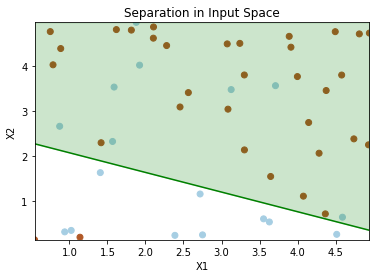

In [ ]:
W,B=log_res(X2,Y2,500,0.1)
a=np.array([[B],[W[0]],[W[1]]])
print(W)
print(B)
print (a)
plot_sep(a,X2,Y2)

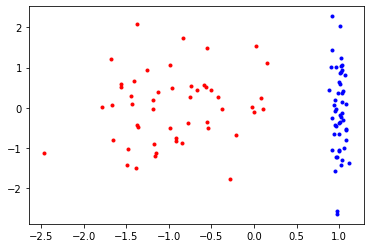

In [ ]:
# generate a separable DS
separable = False
while not separable:
    samples = sklearn.datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

In [ ]:
X3 =np.array( [samples[0][:100,0],samples[0][:100,1]])
X3=np.transpose(X3)
Y3 = np.array(samples[1])


iteration :  0  loss :  34.657359027997266  stable loss : 34.657359027997266
iteration :  50  loss :  12.528620619983606  stable loss : 12.528620619983604
iteration :  100  loss :  8.238680131869073  stable loss : 8.238680131869073
iteration :  150  loss :  6.413202700915596  stable loss : 6.413202700915598
iteration :  200  loss :  5.368047916340411  stable loss : 5.368047916340411
iteration :  250  loss :  4.674198510383955  stable loss : 4.674198510383956
iteration :  300  loss :  4.171566192762838  stable loss : 4.171566192762838
iteration :  350  loss :  3.7860926349850246  stable loss : 3.7860926349850246
iteration :  400  loss :  3.4784264975483516  stable loss : 3.478426497548352
iteration :  450  loss :  3.225531223659792  stable loss : 3.2255312236597926
iteration :  500  loss :  3.016846665916166  stable loss : 3.0168466659161655
[ 3.87418131 -0.24324529]
-0.7215710883084228
[[-0.72157109]
 [ 3.87418131]
 [-0.24324529]]


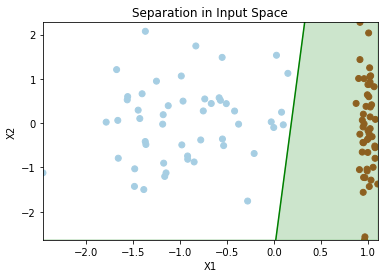

In [ ]:
W,B=log_res(X3,Y3,500,0.1)
a=np.array([[B],[W[0]],[W[1]]])
print(W)
print(B)
print (a)
plot_sep(a,X3,Y3)

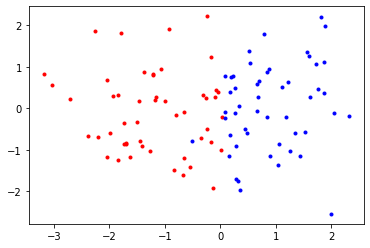

In [ ]:
separable = True
while separable:
    samples = sklearn.datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

In [ ]:
X4 =np.array( [samples[0][:100,0],samples[0][:100,1]])
X4=np.transpose(X4)
Y4 = np.array(samples[1])

iteration :  0  loss :  34.657359027997266  stable loss : 34.657359027997266
iteration :  50  loss :  15.021716644299733  stable loss : 15.021716644299733
iteration :  100  loss :  11.98636926765423  stable loss : 11.98636926765423
iteration :  150  loss :  10.641627500634046  stable loss : 10.641627500634046
iteration :  200  loss :  9.843856712447383  stable loss : 9.843856712447382
iteration :  250  loss :  9.299945248168271  stable loss : 9.299945248168271
iteration :  300  loss :  8.897685337823177  stable loss : 8.897685337823177
iteration :  350  loss :  8.583968817018501  stable loss : 8.583968817018501
iteration :  400  loss :  8.33004081682648  stable loss : 8.33004081682648
iteration :  450  loss :  8.118802512002302  stable loss : 8.118802512002304
iteration :  500  loss :  7.942686255643247  stable loss : 7.942686255643247
[ 3.5445761  -0.07516535]
0.17717955089725887
[[ 0.17717955]
 [ 3.5445761 ]
 [-0.07516535]]


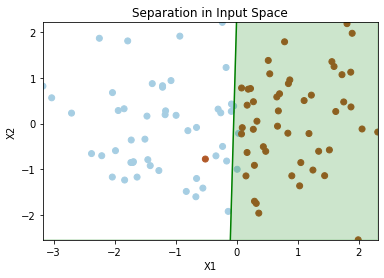

In [ ]:
W,B=log_res(X4,Y4,500,0.1)
a=np.array([[B],[W[0]],[W[1]]])
print(W)
print(B)
print (a)
plot_sep(a,X4,Y4)

In [ ]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [ ]:
a=np.ones(10)
b=np.ones(10)
b[5]=10
print(softmax(a))
print(softmax(b))
# we can see that softmax of similar values gives us a vector of dimension 10 with similar values of 0.1 that all add up to 1
# when we use an input vector with a values significantly greater than the rest we can see it outputs a vector where F(xk) is significatly greater than the rest.

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[1.23272886e-04 1.23272886e-04 1.23272886e-04 1.23272886e-04
 1.23272886e-04 9.98890544e-01 1.23272886e-04 1.23272886e-04
 1.23272886e-04 1.23272886e-04]


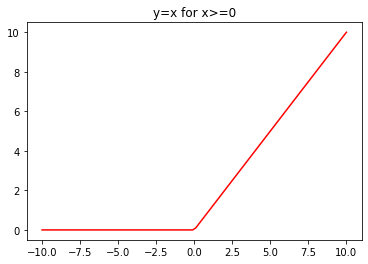

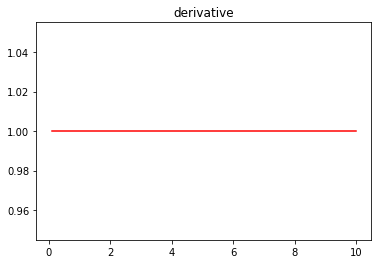

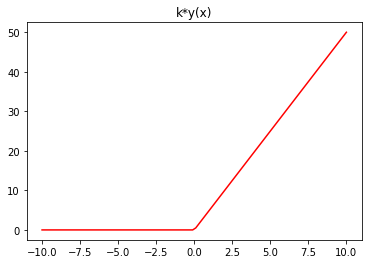

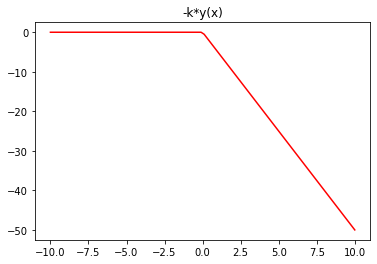

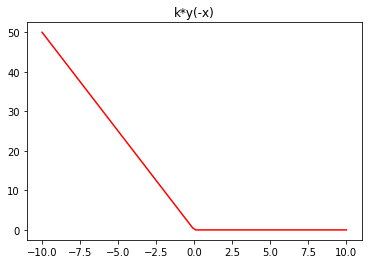

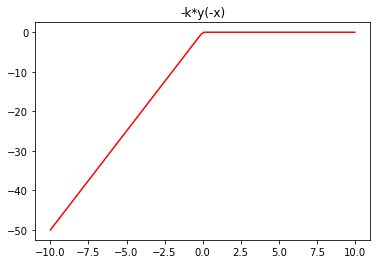

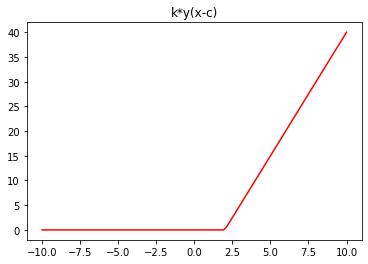

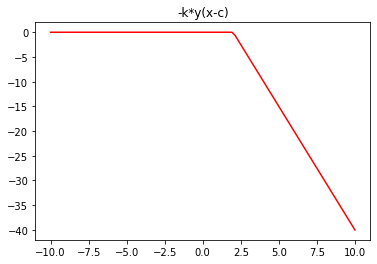

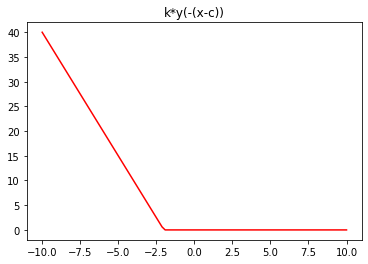

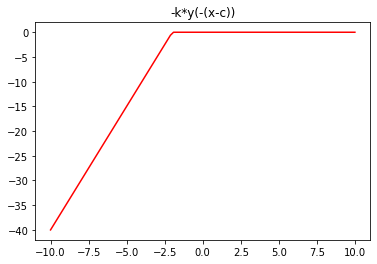

In [ ]:
x = np.linspace(-10,10,100)
x1=np.multiply(-1,x)
k=5
c=2
y=np.zeros(np.size(x))
y1=np.zeros(np.size(x))
y2=np.zeros(np.size(x))
yd=np.zeros(np.size(x))
for i in range(np.size(x)):
  if (x[i]>=0):
    y[i]=x[i]
    yd[i]=1
  else:
    y[i]=0
    yd[i]=None

fig = plt.figure()
plt.plot(x,y, 'r')
plt.title('y=x for x>=0')
plt.show()

fig = plt.figure()
plt.plot(x,yd, 'r')
plt.title('derivative')
plt.show()

# with a multiplicaion of constant k
for i in range(np.size(x)):
  if (x[i]>=0):
    y1[i]=x[i]*k
    y2[i]=x[i]*-k
  else:
    y1[i]=0
    y2[i]=0

fig = plt.figure()
plt.plot(x,y1, 'r')
plt.title('k*y(x)')
plt.show()

fig = plt.figure()
plt.plot(x,y2, 'r')
plt.title('-k*y(x)')
plt.show()

for i in range(np.size(x)):
  if (x1[i]>=0):
    y1[i]=x1[i]*k
    y2[i]=x1[i]*-k
  else:
    y1[i]=0
    y2[i]=0

fig = plt.figure()
plt.plot(x,y1, 'r')
plt.title('k*y(-x)')
plt.show()

fig = plt.figure()
plt.plot(x,y2, 'r')
plt.title('-k*y(-x)')
plt.show()

# with shift of c
for i in range(np.size(x)):
  if (x[i]-c>=0):
    y1[i]=(x[i]-c)*k
    y2[i]=(x[i]-c)*-k
  else:
    y1[i]=0
    y2[i]=0

fig = plt.figure()
plt.plot(x,y1, 'r')
plt.title('k*y(x-c)')
plt.show()

fig = plt.figure()
plt.plot(x,y2, 'r')
plt.title('-k*y(x-c)')
plt.show()

for i in range(np.size(x)):
  if (x1[i]-c>=0):
    y1[i]=(x1[i]-c)*k
    y2[i]=(x1[i]-c)*-k
  else:
    y1[i]=0
    y2[i]=0

fig = plt.figure()
plt.plot(x,y1, 'r')
plt.title('k*y(-(x-c))')
plt.show()

fig = plt.figure()
plt.plot(x,y2, 'r')
plt.title('-k*y(-(x-c))')
plt.show()

In [ ]:
def plr2d_vectorize(X ,T, N):
    #initilize input as np array and convert to row vector
    X=np.array(X)
    if (np.size(X,0) >= np.size(X,1)):
      X=np.transpose(X)

    #initilize weight vector
    W=np.zeros((X.shape[0]+1,1))
    
    # Perceptron learning
    for n in range(0,N,1):
      mismatched=False
      for i in range(T.shape[0]):
        z=np.dot(X[:,i],W[1:])+W[0]
        if z*(T[i]) <= 0:
          mismatched = True
          W[0] = W[0] + (T[i])*1
          W[1] = W[1] + (T[i])*(X[0,i])
          W[2] = W[2] + (T[i])*(X[1,i])
      if mismatched == False:
        print("converged: n=",n)
        break

    print("learning done")
    for i in range(0,T.shape[0]):
      z=np.dot(X[:,i],W[1:])+W[0]
      if z*(T[i]) <= 0:
        print("mismatch[",i,"]")

    return W

In [ ]:
# weights phi 1
x=np.array([[-1,-1,1,1],[-1,1,-1,1]])
t=np.array([-1,-1,1,1])
[[w0],[w1],[w2]]=plr2d_vectorize(x,t,2)
print([w0,w1,w2])

converged: n= 1
learning done
[0.0, 2.0, 0.0]


In [ ]:
# weights phi 2
x=np.array([[-1,-1,1,1],[-1,1,-1,1]])
t=np.array([-1,1,-1,1])
[[w0],[w1],[w2]]=plr2d_vectorize(x,t,2)
print([w0,w1,w2])

converged: n= 1
learning done
[0.0, 0.0, 2.0]


In [ ]:
# weights phi 3
x=np.array([[-1,-1,1,1],[-1,1,-1,1]])
t=np.array([-1,-1,-1,1])
[[w0],[w1],[w2]]=plr2d_vectorize(x,t,2)
print([w0,w1,w2])

converged: n= 1
learning done
[-1.0, 1.0, 1.0]
